In [22]:
# Imports necessary libraries and downloads the historical data for BTC-USD from Yahoo Finance, then displays the first 10 rows of the data.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = 'BTC-USD', start = '2012-01-01',end = '2023-12-31')
data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400


In [23]:
# Displays the last 10 rows of the data.
data.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-21,43648.125000,44240.667969,43330.050781,43869.152344,43869.152344,22452766169
2023-12-22,43868.988281,44367.957031,43441.968750,43997.902344,43997.902344,21028503216
2023-12-23,44012.199219,44015.699219,43351.355469,43739.542969,43739.542969,13507796558
2023-12-24,43728.367188,43945.523438,42786.917969,43016.117188,43016.117188,18830554085
2023-12-25,43010.574219,43765.093750,42765.769531,43613.140625,43613.140625,21115795370
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055


In [24]:
# Adds various technical indicators to the data (RSI, EMAF, EMAM, EMAS), calculates the target variable 
# (the difference between the adjusted close and open prices), creates a binary target class variable, and drops unnecessary columns.
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
# Create a 'dates' array from the original DataFrame before dropping it
original_dates = pd.to_datetime(data['Date'])

data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

/var/folders/gq/w45h2ps907lbr4qhvjw9vwmc0000gn/T/ipykernel_399/3710428248.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]


In [25]:
#  Creates a new dataset with the first 11 columns of the data and displays the first 20 rows.
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)
data_set.head(20)

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,221.968994,240.259003,221.261993,235.427002,50.019072,229.312807,288.640505,327.932773,21.793015,1,257.321014
1,235.528000,259.808014,235.528000,257.321014,58.174526,231.980256,288.020317,326.997518,-22.681992,0,234.824997
2,257.506989,265.610992,227.684006,234.824997,49.315763,232.251183,286.966944,325.776690,-0.981995,0,233.843002
3,234.824997,239.520996,229.022003,233.843002,48.967016,232.402785,285.914985,324.559025,10.188004,1,243.610001
4,233.421997,245.774994,232.313995,243.610001,52.543343,233.470139,285.077263,323.486853,-7.453995,0,236.326004
5,243.779999,244.251007,232.339996,236.326004,49.757135,233.742126,284.111891,322.332404,3.873001,1,240.283005
6,236.410004,242.671997,235.591995,240.283005,51.261414,234.365067,283.243992,321.245657,3.528000,1,243.779007
7,240.251007,247.100998,239.298996,243.779007,52.604668,235.261633,282.462508,320.219609,0.781998,1,244.533997
8,243.751999,255.320007,243.184006,244.533997,52.904994,236.144715,281.711448,319.217151,-8.567001,0,235.977005
9,244.544006,246.391998,233.850998,235.977005,49.124904,236.128743,280.805815,318.114632,2.897003,1,238.891998


In [26]:
# Scales the dataset to a range of 0 to 1 using MinMaxScaler.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
sc_adj_close = MinMaxScaler(feature_range=(0,1))
sc_adj_close.fit(data[['Adj Close']])
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[1.76730917e-04 2.39565673e-04 3.27805591e-04 ... 5.10015892e-01
  1.00000000e+00 6.95198463e-04]
 [3.78083351e-04 5.24678857e-04 5.43361175e-04 ... 5.07025701e-01
  0.00000000e+00 3.61213277e-04]
 [7.04473276e-04 6.09312584e-04 4.24840499e-04 ... 5.08484658e-01
  0.00000000e+00 3.46634179e-04]
 ...
 [6.28283492e-01 6.33833956e-01 6.34125605e-01 ... 4.52051790e-01
  0.00000000e+00 6.29745690e-01]
 [6.42387074e-01 6.35607742e-01 6.36406703e-01 ... 4.73909367e-01
  0.00000000e+00 6.21900056e-01]
 [6.29711711e-01 6.25683595e-01 6.22891222e-01 ... 5.12930810e-01
  1.00000000e+00 6.22753725e-01]]


In [27]:
# Creates a 3D array X to hold the past backcandles days of data for each of the 8 features, and a 1D array y for the target variable.
X = []
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):
        X[j].append(data_set_scaled[i-backcandles:i, j])

X=np.moveaxis(X, [0], [2])
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
print(X)
print(X.shape)
print(y)
print(y.shape)

3242
[[[1.76730917e-04 2.39565673e-04 3.27805591e-04 ... 0.00000000e+00
   8.54480830e-04 1.51359471e-03]
  [3.78083351e-04 5.24678857e-04 5.43361175e-04 ... 4.23545789e-05
   8.43149654e-04 1.49563545e-03]
  [7.04473276e-04 6.09312584e-04 4.24840499e-04 ... 4.66564543e-05
   8.23903952e-04 1.47219246e-03]
  ...
  [1.27798407e-03 1.06839020e-03 1.40287839e-03 ... 6.48253253e-04
   6.50589741e-04 1.12452129e-03]
  [1.24815020e-03 1.03061587e-03 1.29596208e-03 ... 6.71235777e-04
   6.53432005e-04 1.11884086e-03]
  [1.10446037e-03 9.11664784e-04 1.23006863e-03 ... 6.86809311e-04
   6.54969078e-04 1.11235768e-03]]

 [[3.78083351e-04 5.24678857e-04 5.43361175e-04 ... 4.23545789e-05
   8.43149654e-04 1.49563545e-03]
  [7.04473276e-04 6.09312584e-04 4.24840499e-04 ... 4.66564543e-05
   8.23903952e-04 1.47219246e-03]
  [3.67643695e-04 2.28802192e-04 4.45057286e-04 ... 4.90636352e-05
   8.04684075e-04 1.44881023e-03]
  ...
  [1.24815020e-03 1.03061587e-03 1.29596208e-03 ... 6.71235777e-04
   6.

In [28]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2569
(2569, 30, 8)
(643, 30, 8)
(2569, 1)
(643, 1)
[[1.18916794e-03]
 [1.11362965e-03]
 [6.80025381e-04]
 ...
 [6.55294512e-01]
 [6.57552617e-01]
 [6.91991310e-01]]


In [29]:
# Defines and compiles a LSTM model, then fits the model to the training data.
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(50, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0064 - val_loss: 0.0087
Epoch 2/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.5506e-04 - val_loss: 0.0017
Epoch 3/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.5033e-04 - val_loss: 0.0028
Epoch 4/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.7717e-04 - val_loss: 0.0036
Epoch 5/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.3742e-04 - val_loss: 0.0020
Epoch 6/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.3085e-04 - val_loss: 0.0030
Epoch 7/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.5610e-04 - val_loss: 0.0015
Epoch 8/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.5455e-04 - val_loss: 0.0026
Epoch 9/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.1075e-04 - val_loss: 0.0033
Epoch 10/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.4688e-04 - val_loss: 0.0016
Epoch 11/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.6161e-04 - val_loss: 0.0022
Epoch 12/30

In [30]:
# This cell uses the trained model to make predictions on the test set (X_test).
# Also runs a whole prediction for the entire dataset
# It then prints the first 10 pairs of predicted and actual values to provide a quick check on the model’s performance.
dates = data.index[splitlimit + backcandles:]
y_pred = model.predict(X_test)
y_pred_all = model.predict(X)
for i in range(10):
    print(y_pred[i], y_test[i])

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[0.6658091] [0.69655676]
[0.69199663] [0.70157078]
[0.70644015] [0.69558669]
[0.7132177] [0.67296093]
[0.7067678] [0.68399135]
[0.67967755] [0.67786431]
[0.6798953] [0.68654378]
[0.67762625] [0.68905445]
[0.68452215] [0.67321802]
[0.68619967] [0.63834002]


dates shape: (3242,)
dates_test shape: (643,)
y_test_inv shape: (643, 1)


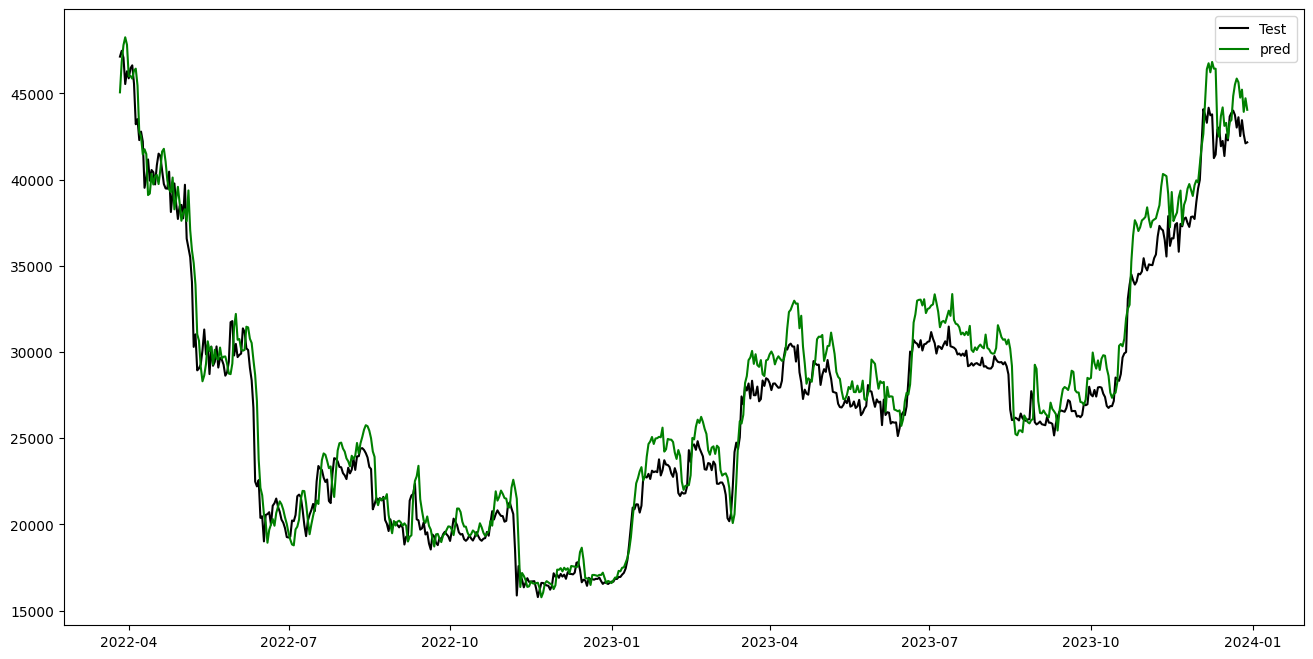

In [36]:
# Plots the prediction

# Reset the index of the 'dates' array
#dates.reset_index(drop=True, inplace=True)

# Then split it into training and testing sets just like you did with 'X' and 'y'
dates_train, dates_test = original_dates[:splitlimit], original_dates[splitlimit+backcandles:]

# Normalize the data for BTC Price from the MixMaxScaler logic

y_test_adj_close = y_test[:, 0:1]  # Select the first feature
y_pred_adj_close = y_pred[:, 0:1]  # Select the first feature


dates_test = original_dates[splitlimit+backcandles:]
y_test_inv = sc_adj_close.inverse_transform(y_test_adj_close)
y_pred_inv = sc_adj_close.inverse_transform(y_pred_adj_close)

print(f'dates shape: {original_dates.shape}')
print(f'dates_test shape: {dates_test.shape}')
print(f'y_test_inv shape: {y_test_inv.shape}')

plt.figure(figsize=(16,8))
plt.plot(dates_test, y_test_inv, color = 'black', label = 'Test')
plt.plot(dates_test, y_pred_inv, color = 'green', label = 'pred')
plt.legend()
plt.show()


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


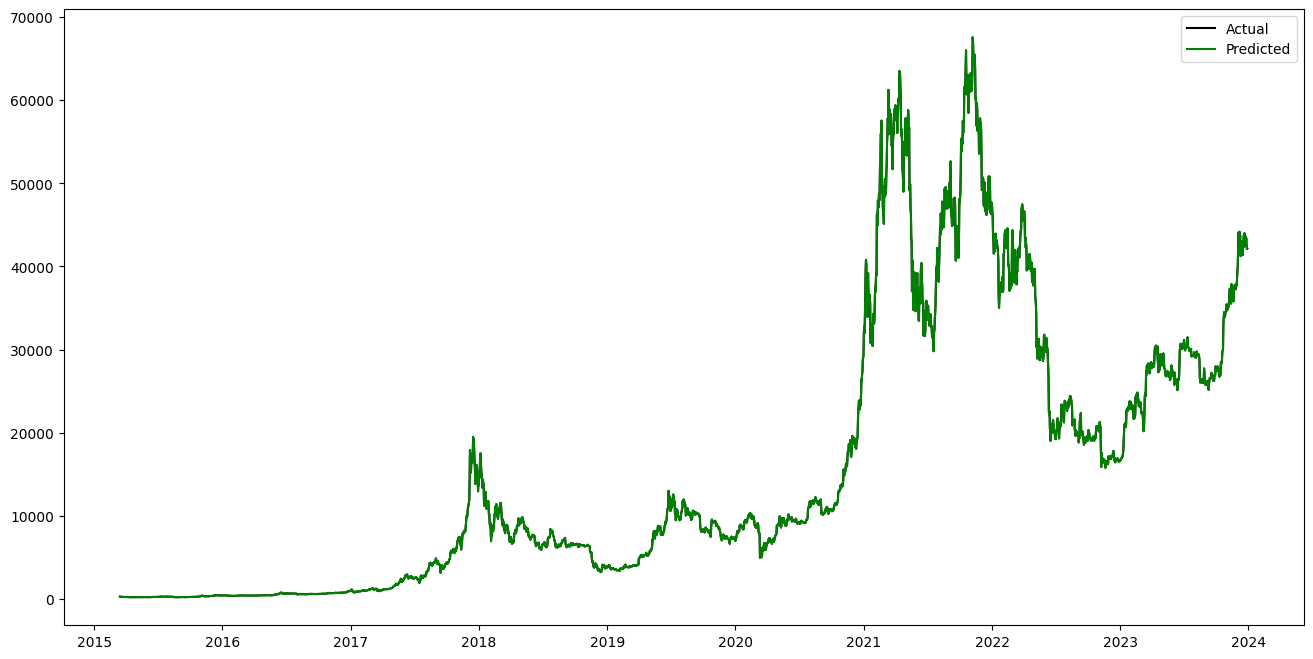

In [40]:
# Predict the whole timeseries
dates_all = original_dates[backcandles:]
y_pred_all = model.predict(X)

# Normalize the data for BTC Price from the MixMaxScaler logic

y_test_all_adj_close = y[:, 0:1]  # Select the first feature
y_pred__all_adj_close = y[:, 0:1]  # Select the first feature

y_test_all_inv = sc_adj_close.inverse_transform(y_test_all_adj_close)
y_pred_all_inv = sc_adj_close.inverse_transform(y_pred__all_adj_close)


plt.figure(figsize=(16,8))
plt.plot(dates_all, y_test_all_inv, color = 'black', label = 'Actual')
plt.plot(dates_all, y_pred_all_inv, color = 'green', label = 'Predicted')
plt.legend()
plt.show()

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━

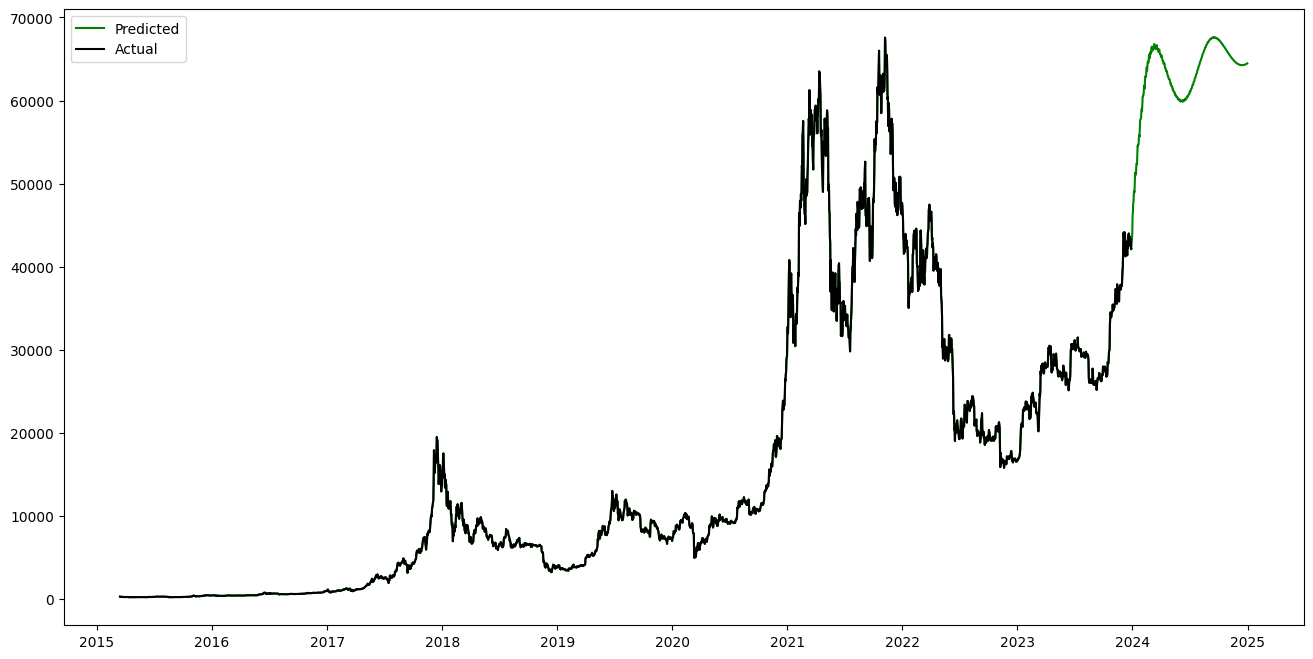

In [51]:
# Predict the whole timeseries
dates_all = original_dates[backcandles:]
y_pred_all = model.predict(X)

# Normalize the data for BTC Price from the MixMaxScaler logic
y_test_all_adj_close = y[:, 0:1]  # Select the first feature
y_pred__all_adj_close = y[:, 0:1]  # Select the first feature

y_test_all_inv = sc_adj_close.inverse_transform(y_test_all_adj_close)
y_pred_all_inv = sc_adj_close.inverse_transform(y_pred__all_adj_close)

# Flatten y_pred_all_inv to 1D array
y_pred_all_inv_flattened = y_pred_all_inv.flatten()

# Prediction for 2024
forecast_days = 366 # for 1 year (including leap year)
input_data = X[-1,:,:]
forecasted_data = []

# Multi-step forecasting
for i in range(forecast_days):
    predicted = model.predict(input_data.reshape(1, backcandles, 8))
    forecasted_data.append(predicted[0])
    input_data = np.roll(input_data, -1)
    input_data[-1] = predicted

# Convert to numpy array and inverse transform
forecasted_data = np.array(forecasted_data)
forecasted_data_inv = sc_adj_close.inverse_transform(forecasted_data)

# Reshape to 1D array
forecasted_data_inv = forecasted_data_inv.reshape(-1)

# Append the forecasted data for 2024 to y_pred_all_inv
y_pred_all_inv_extended = np.concatenate((y_pred_all_inv_flattened, forecasted_data_inv))

# Generate future dates for 2024 and append to dates_all
future_dates = pd.Series(pd.date_range(start='2024-01-01', end='2024-12-31'))
dates_all_extended = pd.concat([dates_all, future_dates])

# Plot the data
plt.figure(figsize=(16,8))
plt.plot(dates_all_extended, y_pred_all_inv_extended, color = 'green', label = 'Predicted')
plt.plot(dates_all, y_test_all_inv, color = 'black', label = 'Actual')
plt.legend()
plt.show()
